In [35]:
import os

from anyio.lowlevel import checkpoint

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import keras
from keras import layers


inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='prediction')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ digits (InputLayer)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prediction (Dense)              │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
keras.utils.plot_model(model, 'end_to_end_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [36]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # use sparse version since labels are ints
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


/home/bs00815/Desktop/MachineLearning/ml-dl-computer-vision-journey/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-11 16:21:10.791826: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9233 - loss: 0.2646 - val_accuracy: 0.9590 - val_loss: 0.1362
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9658 - loss: 0.1131 - val_accuracy: 0.9709 - val_loss: 0.0979
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.9721 - loss: 0.0916
Test accuracy: 0.9721


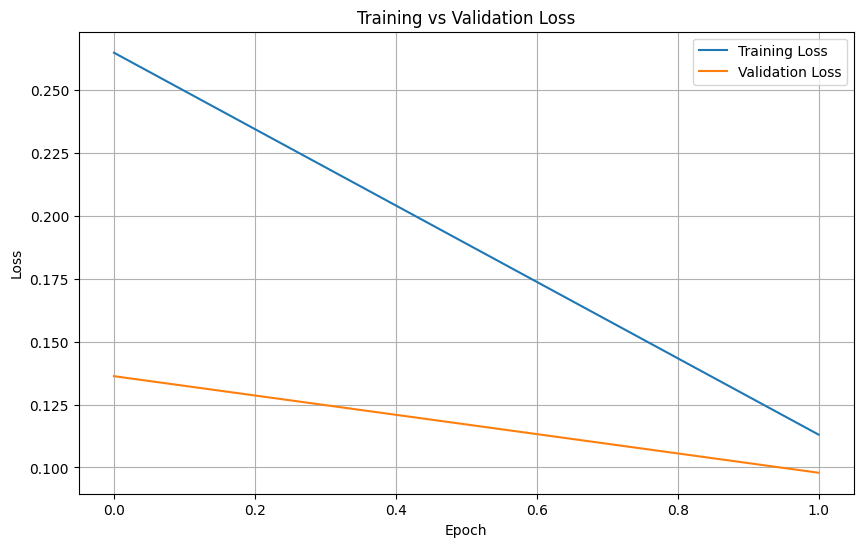

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print(f"Test loss: {results[0]:.4f}")
print(f"Test accuracy: {results[1]:.4f}")

print("Generate prediction of 3 samples.")
predictions = model.predict(x_test[:3])
print("Predicted labels (probabilities shape):", predictions.shape)

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.9721 - loss: 0.0916
Test loss: 0.0916
Test accuracy: 0.9721
Generate prediction of 3 samples.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted labels (probabilities shape): (3, 10)


In [39]:
model.save('my_model.keras')

loaded_model = tf.keras.models.load_model('my_model.keras')
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_file_path = './my_best_model.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_file_path,
    save_weights_only=True, # only save weight
    monitor='val_loss', # Monitor validation loss
    mode='min',  # Save when validation loss is minimized.
    save_best_only=True, # Only save the best performing model.
    verbose=1 # Log when a checkpoint is saved.
)
print("fit model on training data: ")
history = model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint_callback]
)

fit model on training data: 
Epoch 1/2
129/782 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9923 - loss: 0.0244

2025-08-11 16:22:00.644157: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9942 - loss: 0.0179
Epoch 1: val_loss improved from None to 0.09876, saving model to ./my_best_model.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9762 - val_loss: 0.0988
Epoch 2/2
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 2: val_loss did not improve from 0.09876
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9768 - val_loss: 0.1049
